In [34]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import spectral
import spectral.io.envi as envi

from typing import Callable

In [35]:
test = envi.open("Mango/VIS/day_1_m3/mango_day_1_m3_01_back.hdr", image="Mango/VIS/day_1_m3/mango_day_1_m3_01_back.bin")
test.shape

(64, 64, 224)

In [72]:
def load_data(main_folder: str, fruit: str) -> pd.DataFrame:
    absolute = main_folder

    all_folders = os.listdir(absolute)

    data = dict(day=[], fruit=[], hdr=[], bin=[])
    for folder in all_folders:
        data_paths = os.listdir(absolute + "/" + folder)
        day_label = folder.replace("_m3", "")

        for path in data_paths:
            extension = path.split(".")[1]
            if extension == "bin":
                continue
            
            prefix = absolute + "/" + folder + "/"
            data["day"].append(day_label)
            data["fruit"].append(fruit)
            data["hdr"].append(prefix + path)
            data["bin"].append(prefix + data_paths[data_paths.index(path.replace(".hdr", ".bin"))])

    return pd.DataFrame.from_dict(data)

In [73]:
def get_image_min_max(img: np.array):
    print(f"Max band value {np.max(img)}, Min band value {np.min(img)}")
    return img

In [74]:
def read_image(hdr: str, bin: str, image_transforms: list[Callable] | None = None):
    img = envi.open(hdr, image=bin).load()

    if image_transforms is not None and len(image_transforms) != 0:
        for transform in image_transforms:
            img = transform(img)
    
    return img

In [75]:
mango = load_data("Mango/VIS", "mango")
kaki = load_data("Kaki/VIS", "kaki")
mango.head()

,day,fruit,hdr,bin
0,day_10,mango,Mango/VIS/day_10_m3/mango_day_10_m3_01_back.hdr,Mango/VIS/day_10_m3/mango_day_10_m3_01_back.bin
1,day_10,mango,Mango/VIS/day_10_m3/mango_day_10_m3_01_front.hdr,Mango/VIS/day_10_m3/mango_day_10_m3_01_front.bin
2,day_10,mango,Mango/VIS/day_10_m3/mango_day_10_m3_02_back.hdr,Mango/VIS/day_10_m3/mango_day_10_m3_02_back.bin
3,day_10,mango,Mango/VIS/day_10_m3/mango_day_10_m3_02_front.hdr,Mango/VIS/day_10_m3/mango_day_10_m3_02_front.bin
4,day_10,mango,Mango/VIS/day_10_m3/mango_day_10_m3_12_back.hdr,Mango/VIS/day_10_m3/mango_day_10_m3_12_back.bin


In [39]:
paths = load_data("Mango/VIS")
df = pd.DataFrame.from_dict(paths)
df.head()

,day,hdr,bin
0,day_10,Mango/VIS/day_10_m3/mango_day_10_m3_01_back.hdr,Mango/VIS/day_10_m3/mango_day_10_m3_01_back.bin
1,day_10,Mango/VIS/day_10_m3/mango_day_10_m3_01_front.hdr,Mango/VIS/day_10_m3/mango_day_10_m3_01_front.bin
2,day_10,Mango/VIS/day_10_m3/mango_day_10_m3_02_back.hdr,Mango/VIS/day_10_m3/mango_day_10_m3_02_back.bin
3,day_10,Mango/VIS/day_10_m3/mango_day_10_m3_02_front.hdr,Mango/VIS/day_10_m3/mango_day_10_m3_02_front.bin
4,day_10,Mango/VIS/day_10_m3/mango_day_10_m3_12_back.hdr,Mango/VIS/day_10_m3/mango_day_10_m3_12_back.bin


In [ ]:
img = read_image(df.iloc[5].hdr, df.iloc[5].bin, [get_image_min_max])

Max band value 0.8706686496734619, Min band value -0.1077381893992424


ImageView object:
  Display bands       :  [0, 100, 223]
  Interpolation       :  <default>
  RGB data limits     :
    R: [np.float64(-0.2877832055091858), np.float64(0.33476775884628296)]
    G: [np.float64(-0.1174316257238388), np.float64(0.094538114964962)]
    B: [np.float64(-0.2846073508262634), np.float64(0.474455863237381)]

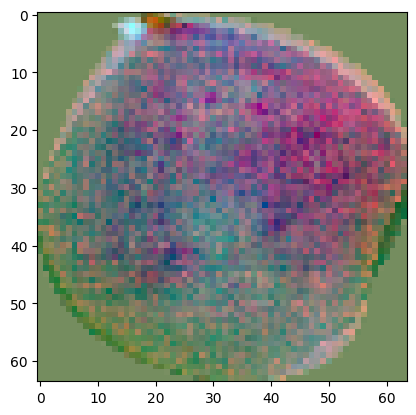

In [50]:
spectral.imshow(z, bands=[0, 100, 223])

ImageView object:
  Display bands       :  [0, 112, 223]
  Interpolation       :  <default>
  RGB data limits     :
    R: [np.float64(-0.07986552268266678), np.float64(0.42770636081695557)]
    G: [np.float64(-0.008525395765900612), np.float64(0.38907209038734436)]
    B: [np.float64(-0.01426206436008215), np.float64(0.5474871397018433)]

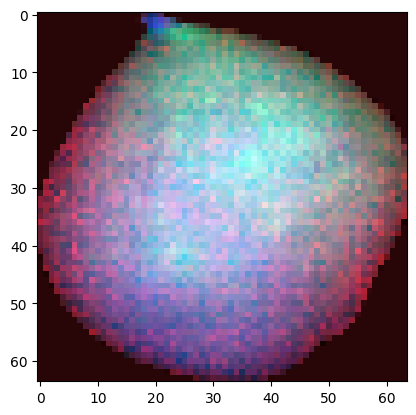

In [43]:
spectral.imshow(day10_img)

ImageView object:
  Display bands       :  [0, 112, 223]
  Interpolation       :  <default>
  RGB data limits     :
    R: [np.float64(-0.08236752450466156), np.float64(0.4334079623222351)]
    G: [np.float64(-0.007678664289414883), np.float64(0.3269498944282532)]
    B: [np.float64(-0.015107342973351479), np.float64(0.6410608887672424)]

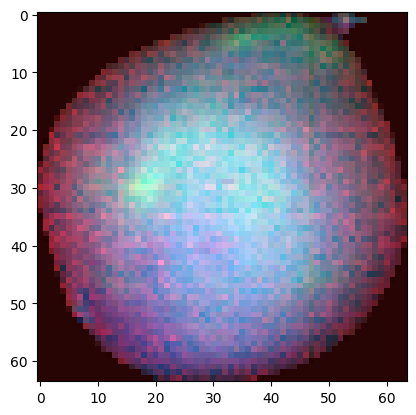

In [44]:
spectral.imshow(img)